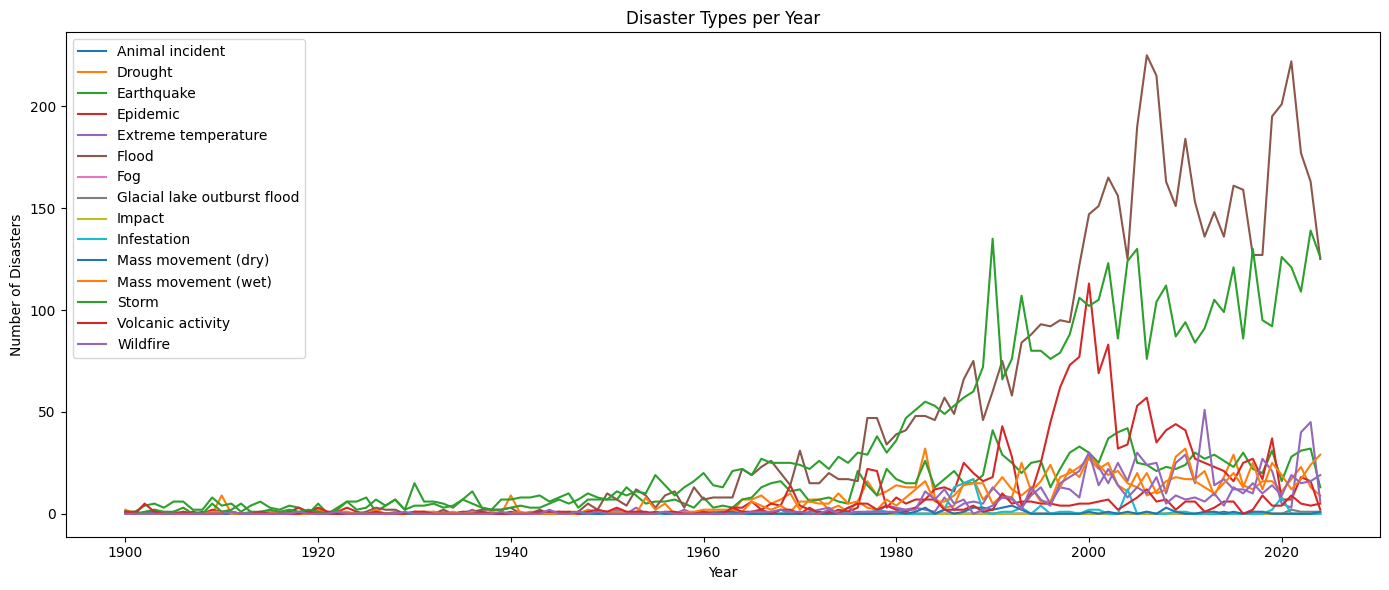

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def load_data(path: str) -> pd.DataFrame:
    """CSV を読み込む関数"""
    return pd.read_csv(path)

def aggregate_by_disaster_and_year(df: pd.DataFrame) -> pd.DataFrame:
    """
    災害種類 × 年ごとの件数を集計する関数
    列名に依存しないため KeyError が出ない安全版
    """
    table = df.pivot_table(
        index="Start Year",
        columns="Disaster Type",
        aggfunc="size",   # ← values を指定しなくても OK
        fill_value=0
    )
    return table

def plot_disaster_trends(pivot: pd.DataFrame):
    """ピボットテーブルをグラフ化する関数"""
    plt.figure(figsize=(14, 6))
    for column in pivot.columns:
        plt.plot(pivot.index, pivot[column], label=column)

    plt.xlabel("Year")
    plt.ylabel("Number of Disasters")
    plt.title("Disaster Types per Year")
    plt.legend()
    plt.tight_layout()
    plt.show()

def main():
    df = load_data("emdat.csv")
    pivot = aggregate_by_disaster_and_year(df)
    plot_disaster_trends(pivot)

if __name__ == "__main__":
    main()
